In [1]:
import numpy as np
import matplotlib.pyplot as plt
import operator
%matplotlib inline

plt.style.use('ggplot')

$\dfrac{\text{d}y}{\text{d}x}=x^2$

What is $y$?

# Integration

## Finding the area under a curve

Suppose we want the area under the curve $y=x^2$ from $x=0$ to $x=5$, as shown. (Perhaps because we're finding displacement from a velocity-time graph for the first $5$ seconds, or we just want to know the area of material we'd need to create that shape.)

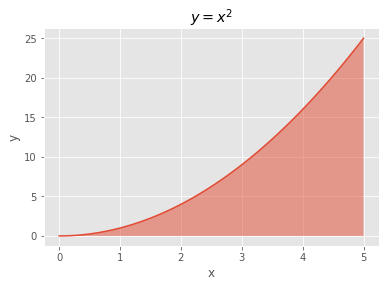

In [2]:
# Define the function
def f(x):
    return x**2
# Define the limits
a, b = 0, 5
# Drawing the curve
tx = np.linspace(a,b,100)
ty = f(tx)
# Figure and axes
fig, ax = plt.subplots()
ax.plot(tx,ty)
ax.fill_between(tx,ty,alpha=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("$y=x^2$");

We could try that Primary school technique of drawing and counting rectangles. One way would be to draw rectangles of height $y$ for a few different $x$-coordinates. If we calculate $y$ using the lefthand side of each rectangle, it might look like this

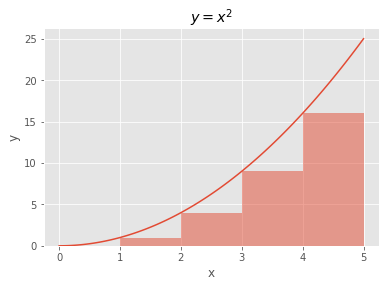

In [3]:
# Number of rectangles
n = 5
# width of rectangles
h = (b-a)/n
# x-coords for rectangles
xs = np.linspace(a,b-h,n)
# find y at left of rectangle
ys = f(xs)
# Figure and axes
fig, ax = plt.subplots()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("$y=x^2$");
ax.bar(xs,ys,h,align='edge',alpha=0.5)
# For drawing the curve
tx = np.linspace(a,b,100)
ty = f(tx)
ax.plot(tx,ty);

In [4]:
print("{} x-coordinates, between {} and {}".format(n, a, b))
print(xs)
print("{} rectangles of width {}".format(n,h))
rs = [h*y for y in ys]
print("with heights")
print(rs,"=", sum(rs))

5 x-coordinates, between 0 and 5
[ 0.  1.  2.  3.  4.]
5 rectangles of width 1.0
with heights
[0.0, 1.0, 4.0, 9.0, 16.0] = 30.0


Obviously this gave an *underestimate* of the true area. What if we calculated $y$ at the *righthand* edge of each rectangle?

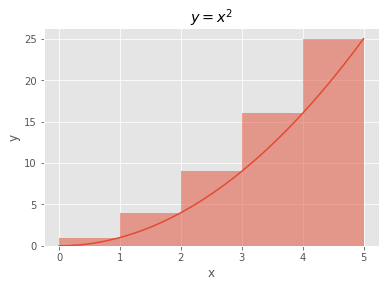

In [5]:
n = 5
# width of rectangles
h = (b-a)/n
# x-coords
xs = np.linspace(a,b-h,n)
# find y at **right** of rectangle
ys = f(xs+h)
# Figure and axes
fig, ax = plt.subplots()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("$y=x^2$");
ax.bar(xs,ys,h,align='edge',alpha=0.5)
# For drawing the curve
tx = np.linspace(a,b,100)
ty = f(tx)
ax.plot(tx,ty);

In [6]:
print("{} x-coordinates, between {} and {}".format(n, a, b))
print(xs)
print("{} rectangles of width {}".format(n,h))
print("with heights")
rs = [h*y for y in ys]
print(rs,"=", sum(rs))

5 x-coordinates, between 0 and 5
[ 0.  1.  2.  3.  4.]
5 rectangles of width 1.0
with heights
[1.0, 4.0, 9.0, 16.0, 25.0] = 55.0


Let's see both the underestimate and the overestimate on the same graph.

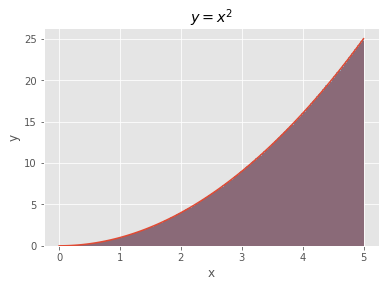

In [15]:
# Number of rectangles
n = 200
# width of rectangles
h = (b-a)/n
#print("Rectangles have width: {}".format(h))
# x-coords
xs = np.linspace(a,b-h,n)
#print("Left x-coordinates",xs)
# find y at **left** of rectangle
lys = f(xs)
# find y at **right** of rectangle
rys = f(xs+h)
# Figure and axes
fig, ax = plt.subplots()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("$y=x^2$");
ax.bar(xs,lys,h,align='edge');
ax.bar(xs,rys,h,align='edge',alpha=0.5)
# For drawing the curve
tx = np.linspace(a,b,100)
ty = f(tx)
ax.plot(tx,ty);

In [16]:
# left areas
lrs = [h*y for y in lys]
# right areas
rrs = [h*y for y in rys]
print("Underestimate",sum(lrs))
print("Overestimate",sum(rrs))

Underestimate 41.3546875
Overestimate 41.9796875


 How could we get a better approximation for the true area?

### Notation

We write $$\int_0^5 x^2\, \text{d}x$$ for the area under the curve $y=x^2$ from $x=0$ to $x=5$.

The $\int$ symbol is a long S for sum, just like the capital Greek $\Sigma$ except it represents a *continuous* rather than discrete sum.

It seems $\int_0^5 x^2\, \text{d}x\approx 41.67$

Find $\int_0^3 x^2\, \text{d}x$ and $\int_0^4 x^2\, \text{d}x$.

What about $\int_2^4 x^2\, \text{d}x$?

$\int_0^3 x^2\, \text{d}x=\dfrac{3^3}{3}$

$\int_0^4 x^2\, \text{d}x=\dfrac{4^3}{3}$

$\int_0^5 x^2\, \text{d}x=\dfrac{5^3}{3}$

Isn't $x^2$ the *derivative* of $\dfrac{x^3}{3}$

Coincidence..?

# The Fundamental Theorem of Calculus

Fortunately, we don't have to use an approximation to integrate any of the curves in your AS exams thanks to a fundamental connection between area and gradient.

The rate at which you acquire area is just the height of the curve.

In other words, **integration** (*area under*) and **differentiation** (*gradient of*) are inverse operations.

### Notation

We write the *indefinite* integral, or *antiderivative*

$$\int x^2\, \text{d}x = \dfrac{x^3}{3} + c$$

Use $\int$ when you're just doing "the opposite of differentiation" and $\int_a^b$ when you're finding an area.

$c$ is some number, called the *constant of integration*. Why is it there? What happens when you differentiate a constant?

## The rules

$$\int x^n\, \text{d}x = \dfrac{x^{n+1}}{n+1}+c$$

$$\int f(x) + g(x) \,\text{d}x = \int f(x)\,\text{d}x + \int g(x)\,\text{d}x = F(x)+G(x)+c$$

To find an area

$$\text{Area under }y=f(x)\text{ between }x=a\text{ and }x=b\text{ is given by }$$

$$\int_a^b f(x)\,\text{d}x = \left[F(x)\right]_a^b = F(b) - F(a)$$